# Nursery School Dataset 

Nursery Database was derived from a hierarchical decision model originally developed to rank applications for nursery schools. It was used during several years in 1980's when there was excessive enrollment to these schools in Ljubljana, Slovenia, and the rejected applications frequently needed an objective explanation. The final decision depended on three subproblems: occupation of parents and child's nursery, family structure and financial standing, and social and health picture of the family. The model was developed within expert system shell for decision making DEX

Now We will read the data and load it into a dataframe in python.

In [1]:
# Importing the libraries which we need now.

import pandas

from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt

%matplotlib inline

# Dataset from - https://archive.ics.uci.edu/ml/datasets/Nursery

df = pandas.read_table('nursery.txt', sep=',', header=None, names=['parents', 'has_nurs', 'form', 'children','housing','finance','social','health','classifier'])


# Summarizing the Dataset

### 1. Dimensions Of the DataSet.

We have some data and if we don't know how many features and instances our dataset has, it is of no use. So, we should find the dimensions of the dataset.

In [2]:
# shape attribute gives the dimensions of a dataframe
print df.shape

(12960, 9)


The above displayed result shows that the dataframe has 12960 rows and 9 colums. It means that we have 9 features and 12960 instances.

### 2. Looking at the data

It's a very good practice to look at your data before you proceed. We can look how our data is structured

In [3]:
# Output printing out first 5 columns
df.head()

,parents,has_nurs,form,children,housing,finance,social,health,classifier
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


### 3. Summary of our data

We can look at the statical summary of every feature. For example, the average of a feature, mean etc.

In [4]:
# The describe function prints the summary of the data
print(df.describe())

       parents   has_nurs      form children   housing finance   social  \
count    12960      12960     12960    12960     12960   12960    12960   
unique       3          5         4        4         3       2        3   
top      usual  very_crit  complete        3  critical  inconv  nonprob   
freq      4320       2592      3240     3240      4320    6480     4320   

           health classifier  
count       12960      12960  
unique          3          5  
top     not_recom  not_recom  
freq         4320       4320  



***************************************************************************************************************



If we look at the above result clearly, we can infer the following. Let us take example of the feature 'parent'

count : 12960  (It gives the number of instances of that feature. Here all features have same count. So, we can infer that there         are no missing values.)

unique : 3     (This number says that there 3 different categories of feature parent.)

top : usual    (This gives the category which occured the highest number of times in a feature)

freq : 4320    (This gives the frequency of the top occurence category in that feature.)



********************************************************************************************************************************

### 4. Class distribution

We can find out how the data is distributed. Because sometimes we might get some data which may be skewed. This leads to unexpected behaviour of our prediction model. 



In [5]:
# The group by function summarizes a particular feature.
print(df.groupby('classifier').size())

classifier
not_recom     4320
priority      4266
recommend        2
spec_prior    4044
very_recom     328
dtype: int64


****

In the above summary data, we can see that the values feature has 5 different observations.  So, we should look at the data distribution of the expected output for every instance. 

Here, as we can see, the recommended variable is very less. Almost negligible.  very_recom variable is seen in 328 observations which is not too high but enough to train our machine.


The remaining three variables are almost equally distributed.




***

## Data Vizualization 

Now that we have a rough idea of our dataset, we can understand it much better by vizualising it. Data can be vizualised by either Univariate plots or Multivariate plots.

Univariate plots helps us in understanding a particular feature. 

Where as Multivariate plots helps us in understanding the relationship between different features.

### 1. Univariate plots

Now we will start with univariate plots to understand each feature in our dataset. Run the cell below to get the same information.


To plot the data, we need Integer values because we cannot plot strings. So, we should convert all the variables into Integer values. So, we use the map function to do the task.


In [6]:
# Converting the data into Integers to plot.

df['parents'] = df.parents.map({'usual':0, 'pretentious':1, 'great_pret':2 })
df['has_nurs'] = df.has_nurs.map({'proper':0, 'less_proper':1, 'improper':2 ,'critical':3,'very_crit':4})
df['form'] = df.form.map({'complete':0, 'completed':1, 'incomplete':2,'foster':3 })
df['children'] = df.children.map({'1':1, '2':2,'3':3,'more':4 })
df['housing'] = df.housing.map({'convenient':0, 'less_conv':1, 'critical':2 })
df['finance'] = df.finance.map({'convenient':0, 'inconv':1 })
df['social'] = df.social.map({'nonprob':0, 'slightly_prob':1, 'problematic':2 })
df['health'] = df.health.map({'recommended':0, 'priority':1, 'not_recom':2 })
df['classifier'] = df['classifier'].map({ 'recommend':0,'not_recom':1, 'very_recom':2,'priority':3,'spec_prior':4 })

# Prints first five values of the dataset
df.head()

,parents,has_nurs,form,children,housing,finance,social,health,classifier
0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,1,3
2,0,0,0,1,0,0,0,2,1
3,0,0,0,1,0,0,1,0,0
4,0,0,0,1,0,0,1,1,3


Here if we observe the above dataframe, we can see that all the data is converted into Integer values which is suitable for plotting in various graphs.

### Box & Whisker plots to analyse the distribution of categories in features of data set

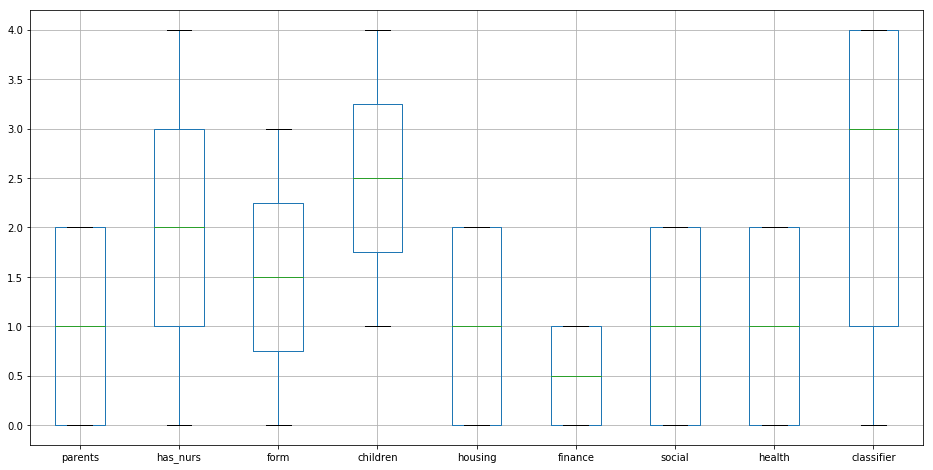

In [7]:
# Sets the figure size
plt.rcParams['figure.figsize'] = (16,8)

# This plots the data in a box plot
df.boxplot()
plt.show()


The above figure shows the distribution of the data in a box plot.Box plot gives the idea about the distribution of data on individual features i.e 

The box an whisker plots are mapped on a scale from 0 to 4 because during our data conversion from non numeric to numeric the least value is 0 and the highest is 4.

Lets dive into the information of the each and every box and whisker plot of every feature.


PARENTS--->smallest value:0,median:1,largest value:2,lower quartile=0,higher quartile=1,outliers:none

HAS_NURS--->smallest value:0,median:2,largest value:4,lower quartile=1,higher quartile=3,outlier:none

FORM--->smallest value:0,median:1.5,largest value:3,lower quartile=0.75,higher quartile=2.25,outliers:none

CHILDREN--->smallest value:1,median:2.5,largest value:4,lower quartile=1.75,higher quartile=3.25,outliers:none

HOUSING--->smallest value:0,median:1,largest value:2,lower quartile=0,higher quartile=1,outliers:none

FINANCE--->smallest value:0,median:0.5,largest value:1,lower quartile=0,higher quartile=1,outliers:none

SOCIAL--->smallest value:0,median:1,largest value:2,lower quartile=0,higher quartile=1,outliers:none

HEALTH--->smallest value:0,median:1,largest value:2,lower quartile=0,higher quartile=1,outliers:none

CLASSIFIER--->smallest value:0,median:3,largest value:4,lower quartile=1,higher quartile=4,outliers:none


Note(take over information):
The main intention behind the visualisation of data set in box plots is to find the outliers, it is clearly evident that there is no instance which falls one and half ranges of INNER QUARTILE or one and half ranges the UPPER QUARTILE. This helps us to conclude that the data set is distributed without outliers and it is distributed without too much uncertainty, however we have to explore how much every unique categorical value are contributing to features inorder to get better idea on the data.




### Distribution of values in features.

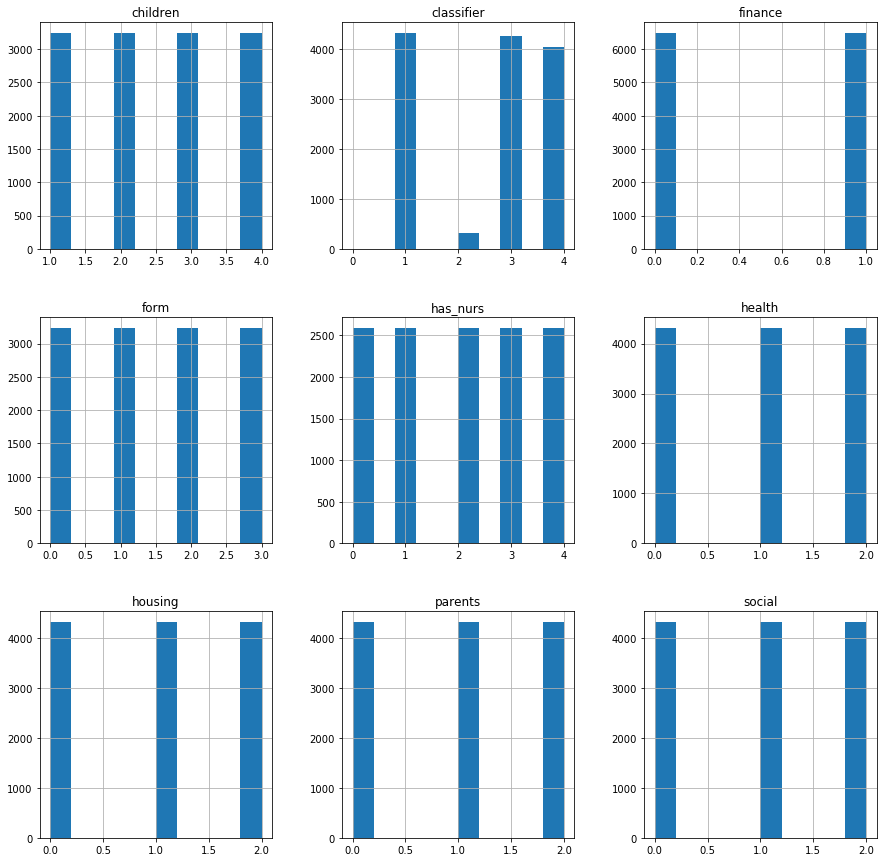

In [8]:
# Sets the figure size
plt.rcParams['figure.figsize'] = (15,15)

# This plots the data in a histogram
df.hist()
plt.show()


The above figure shows the histograms  for of the features.we can see the distribution of data in every parameter.

Childern: all the categorical values i.e 1,2,3,4 each of 25% states that the feature is uniformly distributed.

classifier:the categories 1,2 are almost uniformly distributed and 4 stands next to them,but coming to 2 it is very much low,at the category 0 is not at all visible because it is very much less when compared to others.

finance:it is uniformly distributed with 50% of each category.

form:all the categories 0,1,2 are having 33.33% contribution each i.e uniformly distributed.

has_nurse:all the 5 categories with contribution of 25% summed up equally to form a uniform distribution.

health:uniformly distributed with each category contribution of 33.33%.

housing:uniform distribution is visualised with each contribution of 33.33%.

parents:uniformly distributed and we have enough instances each of 33.33%.

social:all the three categories are uniformly distributed with 33.33% each.


Note:
In the classifier feature there is more to explore we have to find the contribution of each and every category,from the histogram we can conclude that the distribution is skewed,so we will dive into pie chart to explore this feature.


### Pie plot to explore 'classifier' feature

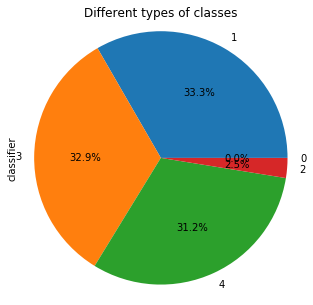

In [9]:
df.classifier.value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.axis('equal')  #to look like a circle
plt.title('Different types of classes') #title of the pie chart
fig = plt.gcf() # to get the current figure created
fig.set_size_inches(5,5) # set the size of the circle
plt.show()


In the histogram plot for the classifier we cannot represent "recommended category" because there are only just 3 instances out of 12960 so here we came up with pie plot where we can identify the recommended category which is nearly equal to 0.0

So the contribution is as follows

0--->0.002%(almost nearly equal to 0)

1--->33.3%

2--->2.5%

3--->32.9%

4--->31.2%

we dont have enough instances for the category 0 and 2, this is  a bit skewed feature.

### 2. Multivariate Plots

Now, we will create some multivariate plots.

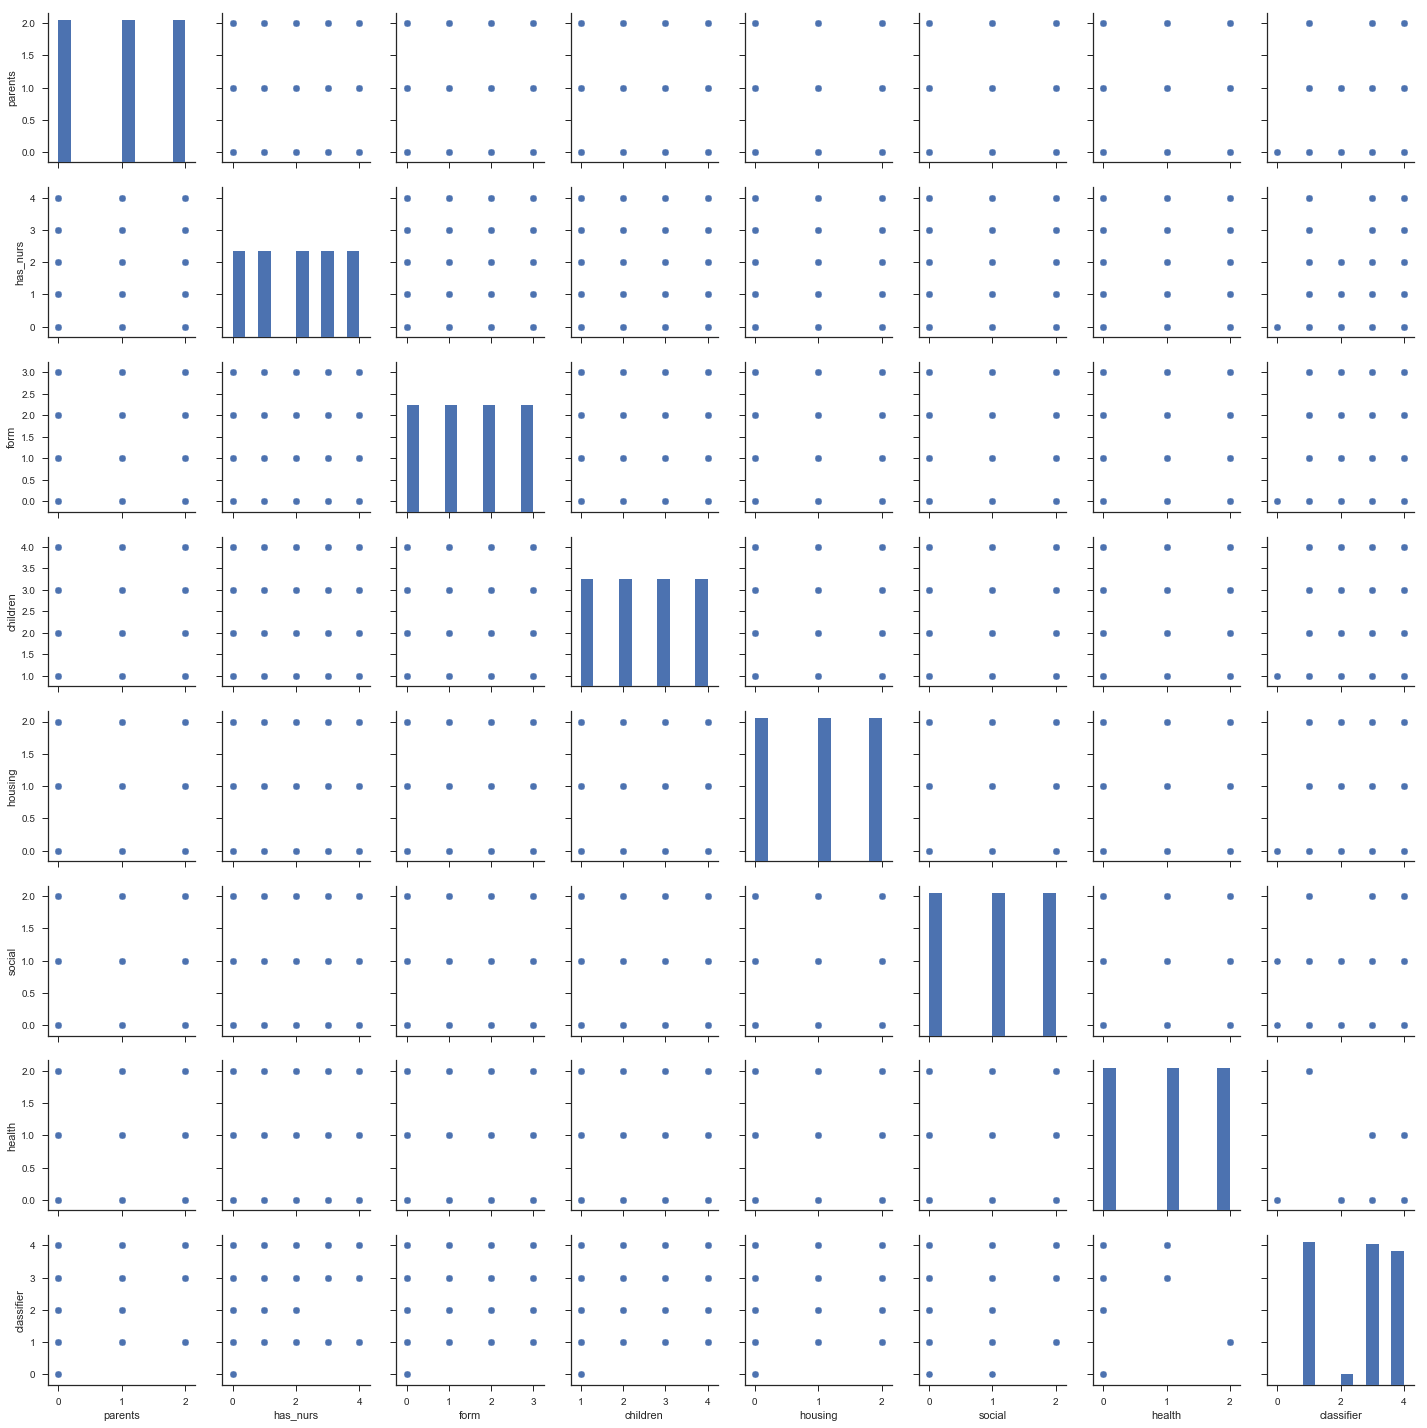

In [29]:
# This piece of code generates a Matrix form of Scatter Plot.
# scatter_matrix(df)
# plt.rcParams['figure.figsize'] = (40, 40)

# # Displays the scatter plot for our dataframe.
# plt.show()

import seaborn as sns; sns.set(style="ticks", color_codes=True)

g = sns.pairplot(df)

*********

The above figure shows the scatter plots of all features in the form of a matrix.
Scatter plots are similar to line graphs in that they use horizontal and vertical axes to plot data points. However, they have a very specific purpose. Scatter plots show how much one variable is affected by another. The relationship between two variables is called their correlation .

If the plot is densly populated then the parameters has strong realtion between each other,the has_nurs paramter is strongly connected with different categories while the finance parameter is weakly connected with other parameters.

*********

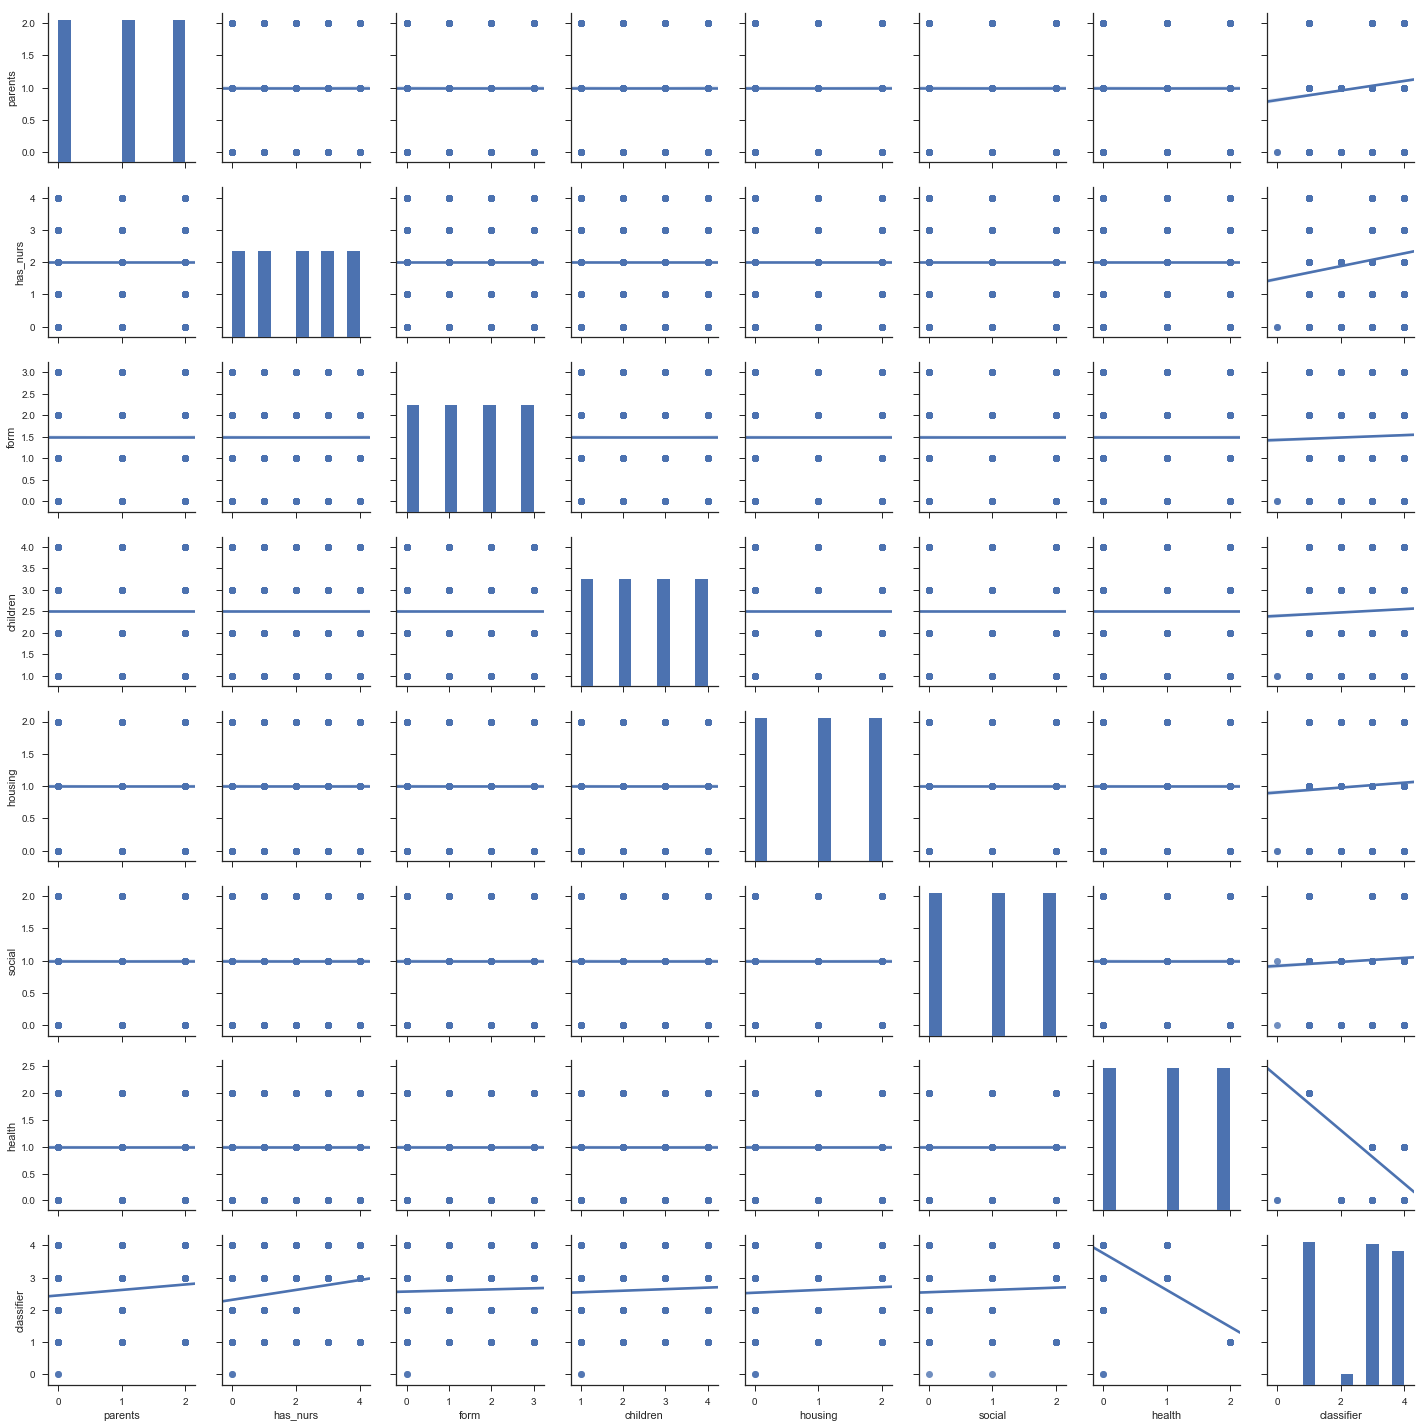

In [30]:
g = sns.pairplot(df, kind="reg")

## Summary

So, we described the feaures of Nursery School data, sanitized the data and vizualised it using pandas and matplotlib libraries.

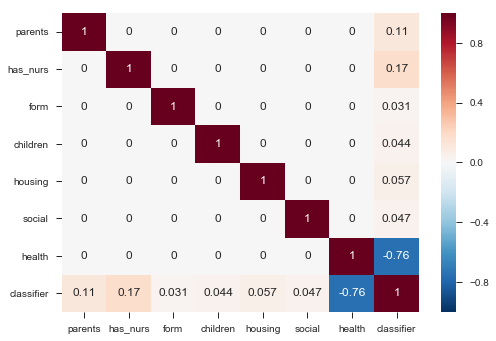

In [31]:
sns.heatmap(df.corr(),annot=True)

# Developing models

we will go with different models and will find out which suits the best

In [33]:
#using the default knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing, cross_validation, neighbors
x=df.drop('classifier',axis=1)
y=df['classifier']
X_train, X_test, y_train, y_test = cross_validation.train_test_split(x, y, test_size=0.2)

clf = neighbors.KNeighborsClassifier(n_neighbors = 5, weights='uniform', algorithm='auto')
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)


0.925154320988


In [34]:
from sklearn import preprocessing, cross_validation,svm
from sklearn.linear_model import LinearRegression

clf=LinearRegression()
clf.fit(X_train,y_train)
accuracy = clf.score(X_test,y_test)
print accuracy

0.604576097161


In [35]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train,y_train)
accuracy = clf.score(X_test,y_test)
print accuracy

0.953317901235


In [36]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)
accuracy = clf.score(X_test,y_test)
print accuracy

0.93287037037


In [37]:
from sklearn import linear_model, datasets
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X_train,y_train)
accuracy = clf.score(X_test,y_test)
print accuracy

0.895061728395


In [38]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train,y_train)
accuracy = clf.score(X_test,y_test)
print accuracy

0.851080246914
